In [1]:
import scipy.io
import numpy as np

import jax.numpy as jnp
import jax.nn as jnn
from jax import grad, random, device_put
import matplotlib.pyplot as plt
from mnist import MNIST
import numpy as np
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import argparse
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import torchvision.transforms as transforms
import math
from dataclasses import dataclass
import os
import time

In [2]:
mat = scipy.io.loadmat('dataset_home_276.mat')
keys = ['csid_home', 'csiu_home', 'label_home']
csid_home = mat['csid_home']
csiu_home = mat['csiu_home']
label_home = mat['label_home']

In [3]:
print("Shape of Channel State Information of CSI in Downlink", csid_home.shape)
print("Shape of Channel State Information of CSI in Uplink", csiu_home.shape)
print("Labels shape:", label_home.shape)
print(np.unique(label_home))

Shape of Channel State Information of CSI in Downlink (200, 30, 3, 2760)
Shape of Channel State Information of CSI in Uplink (200, 30, 3, 2760)
Labels shape: (2760, 1)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 

In [7]:
csi_data = np.abs(csid_home)

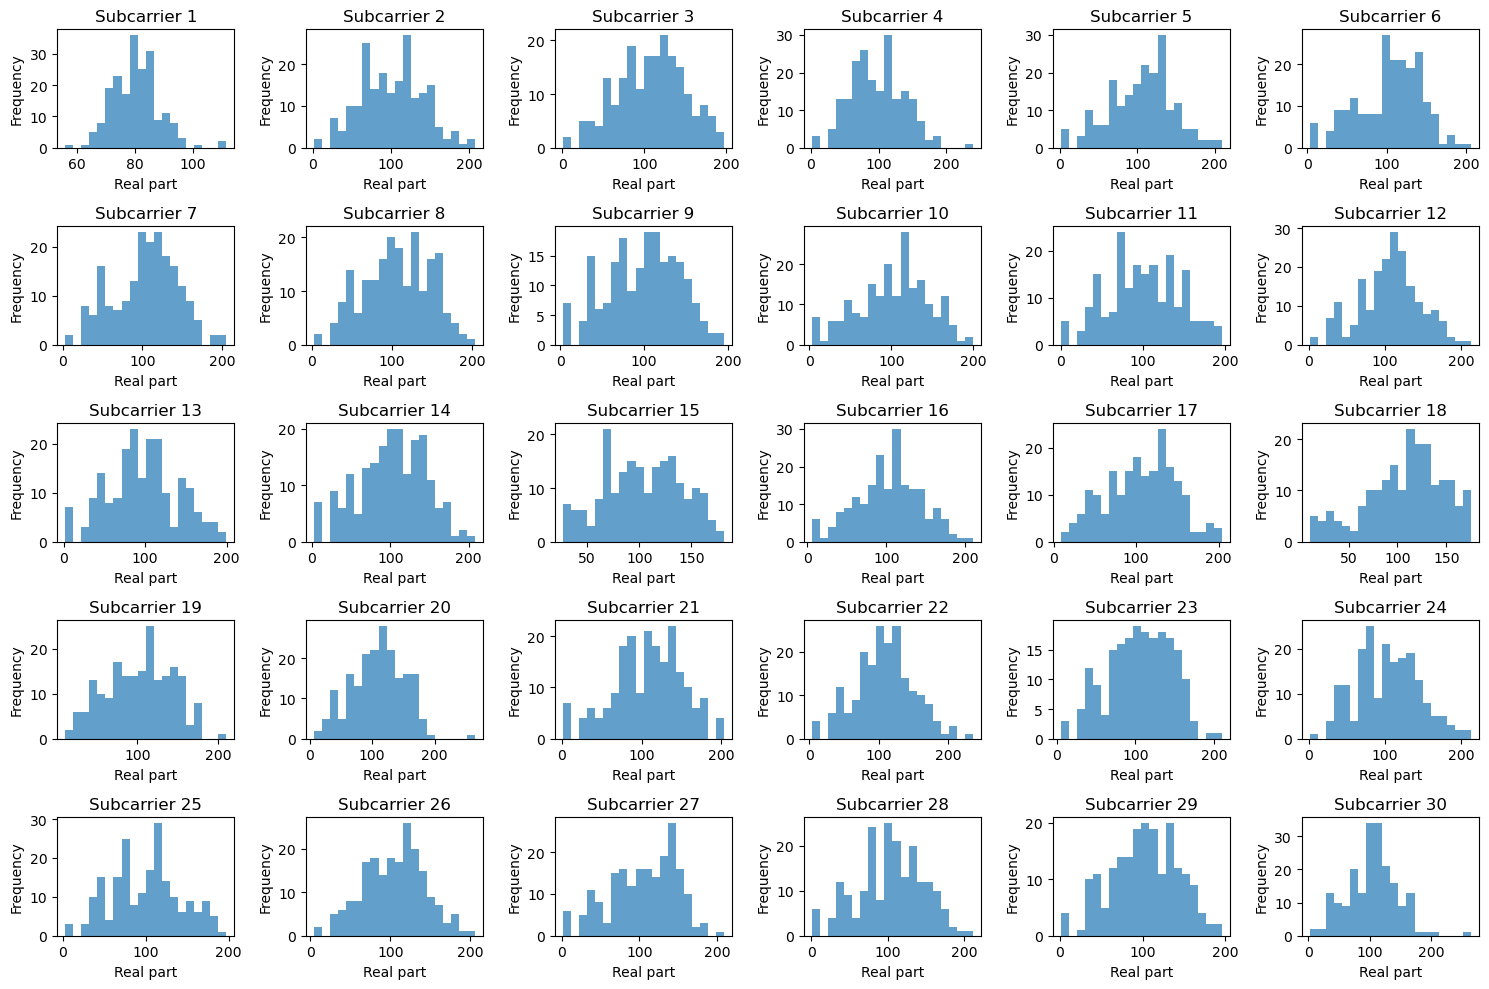

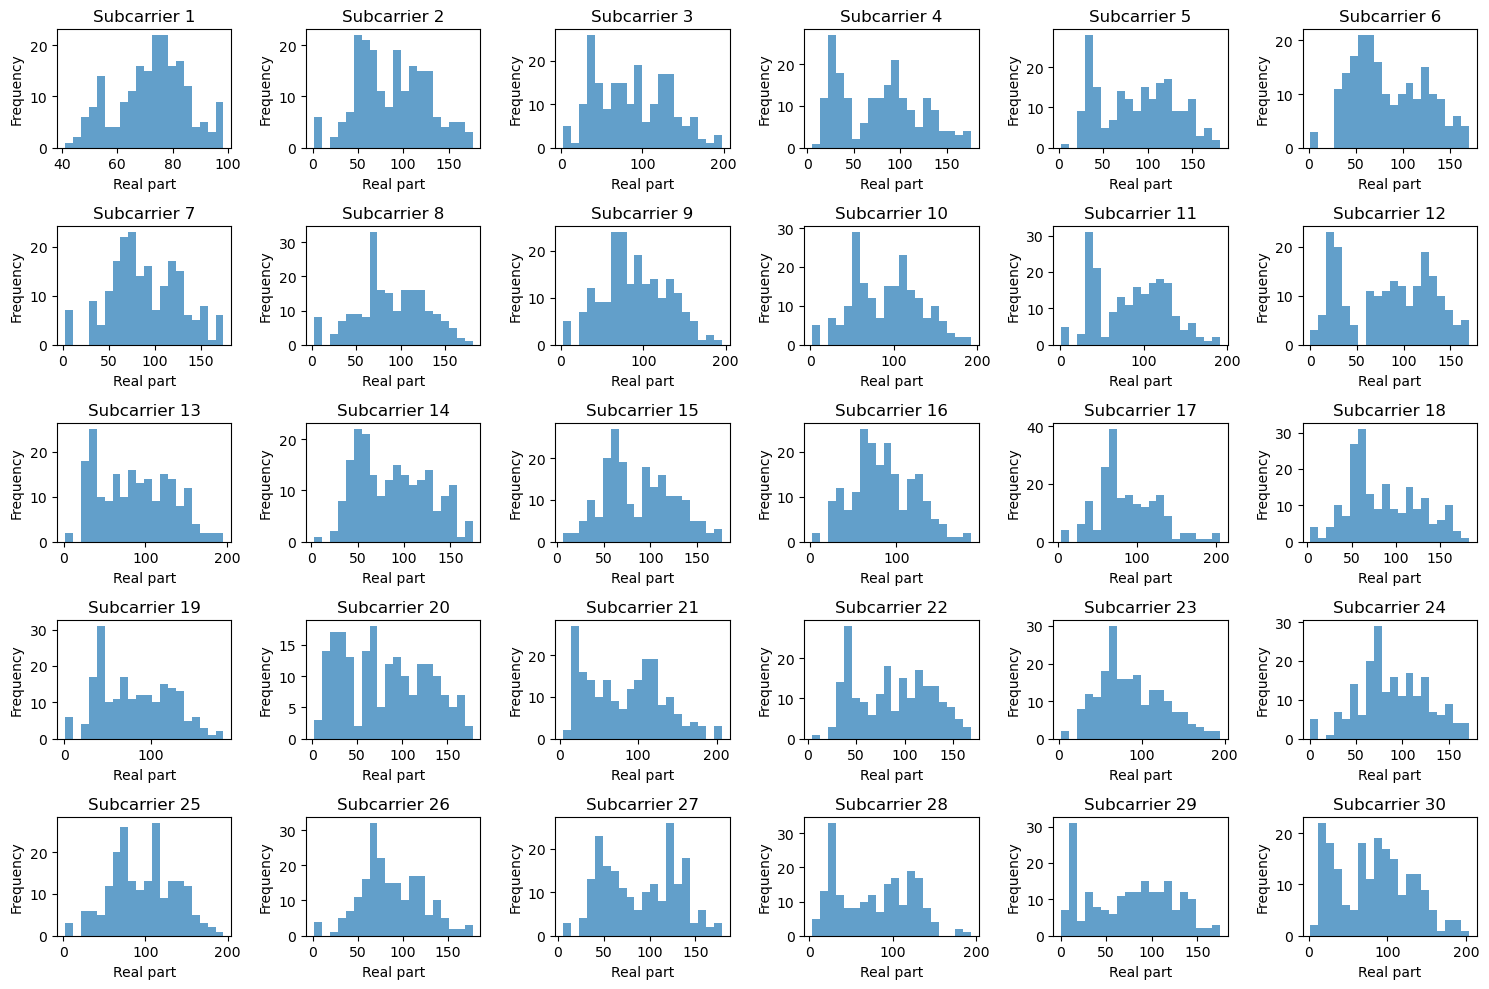

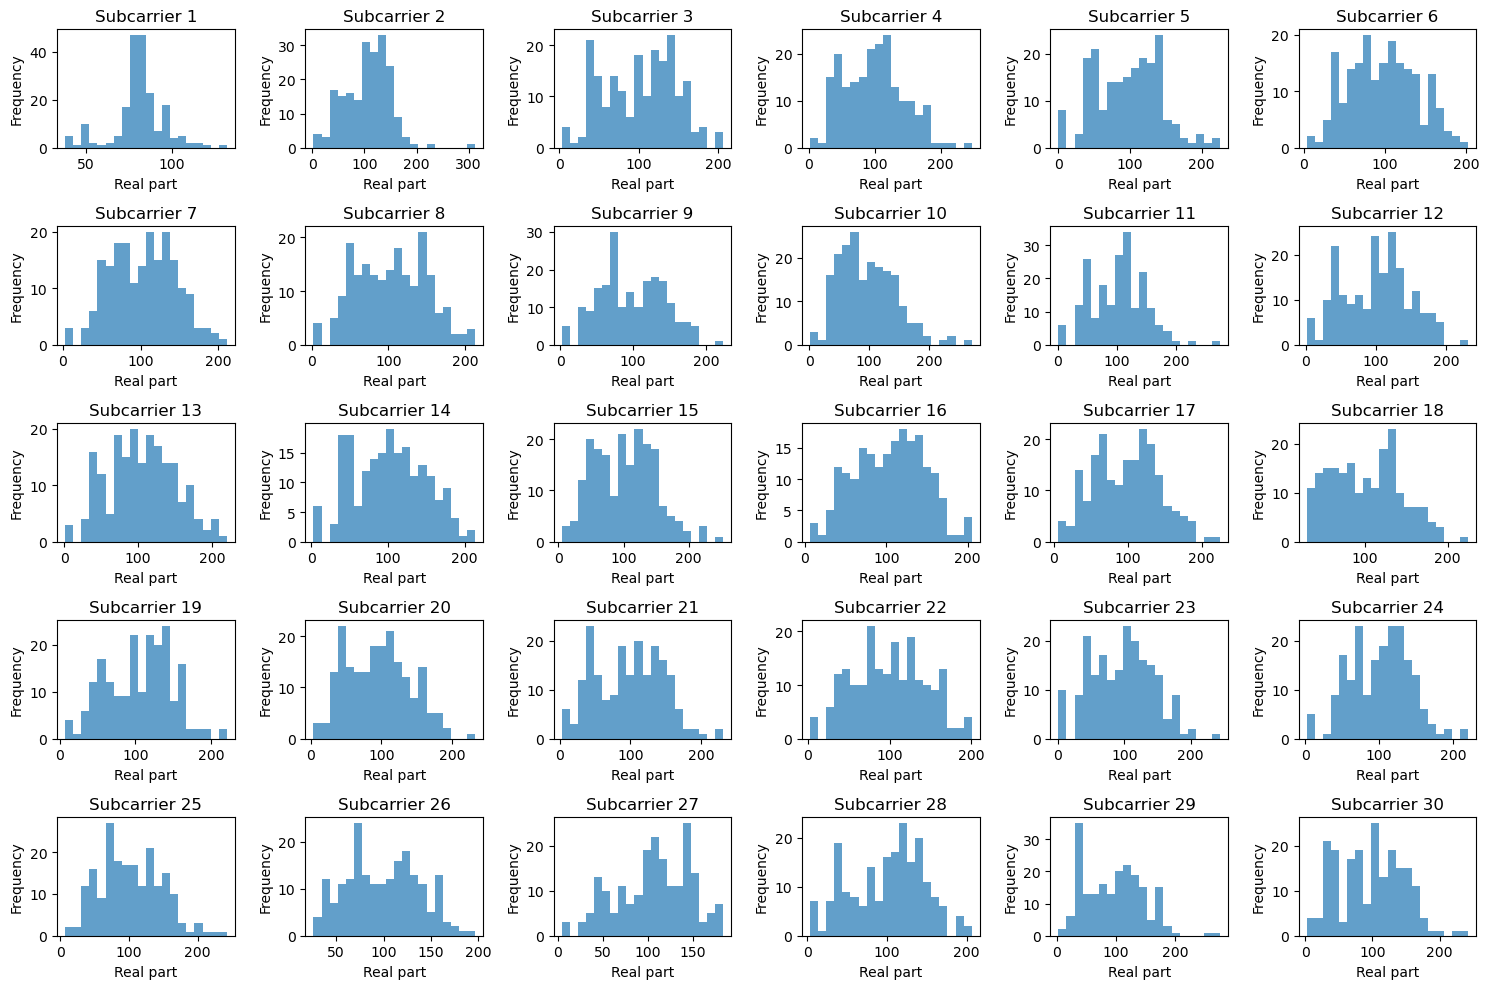

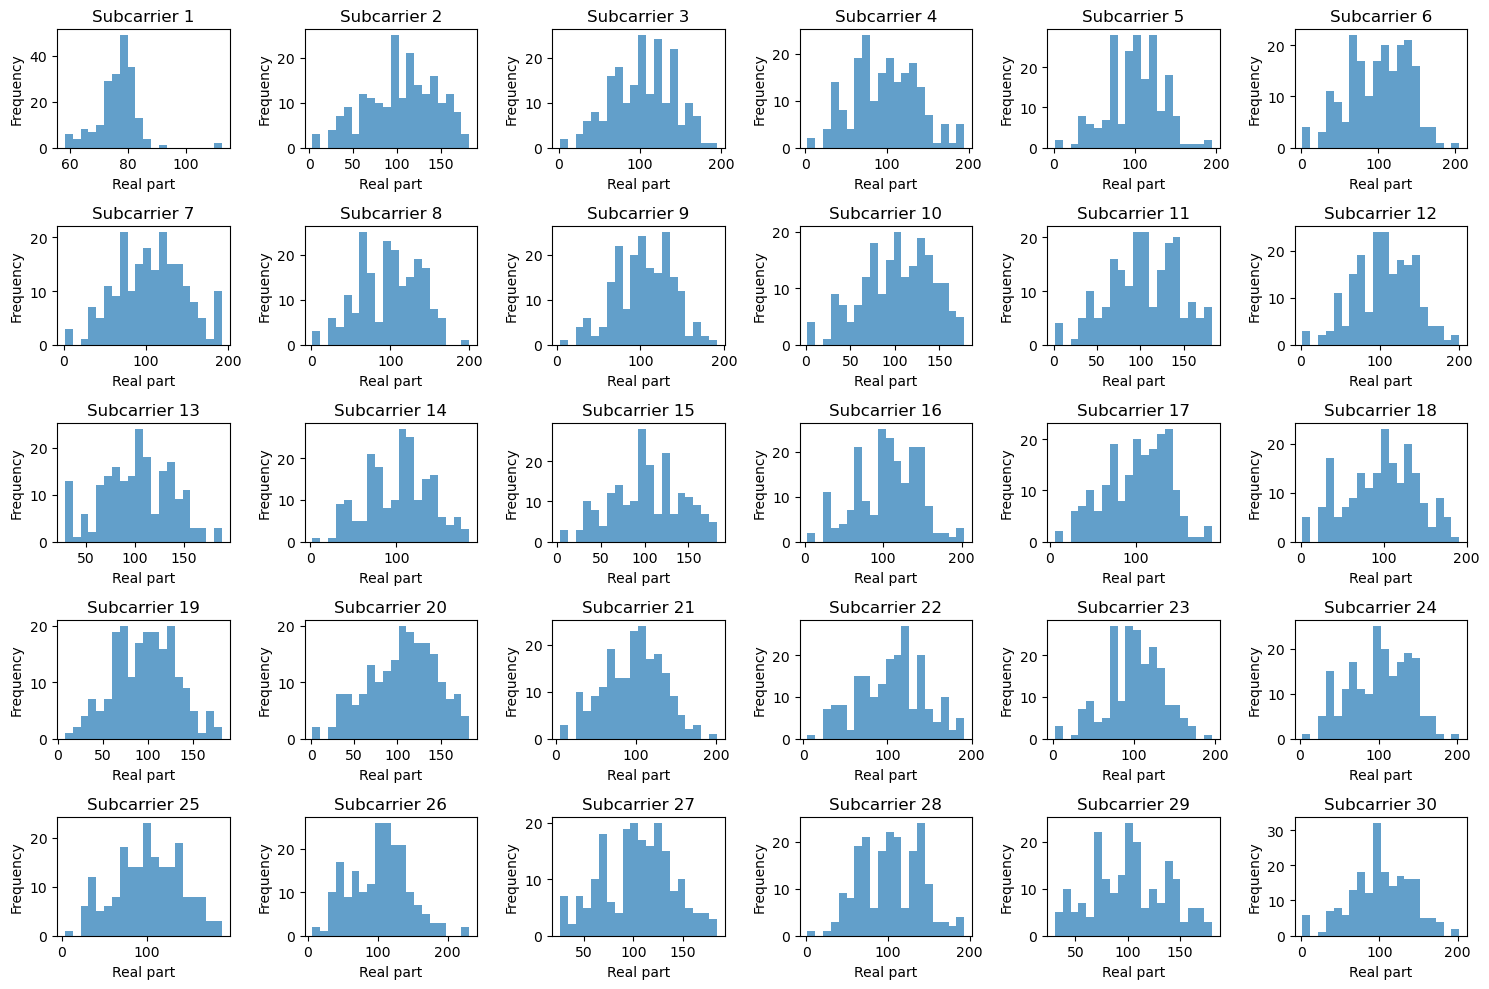

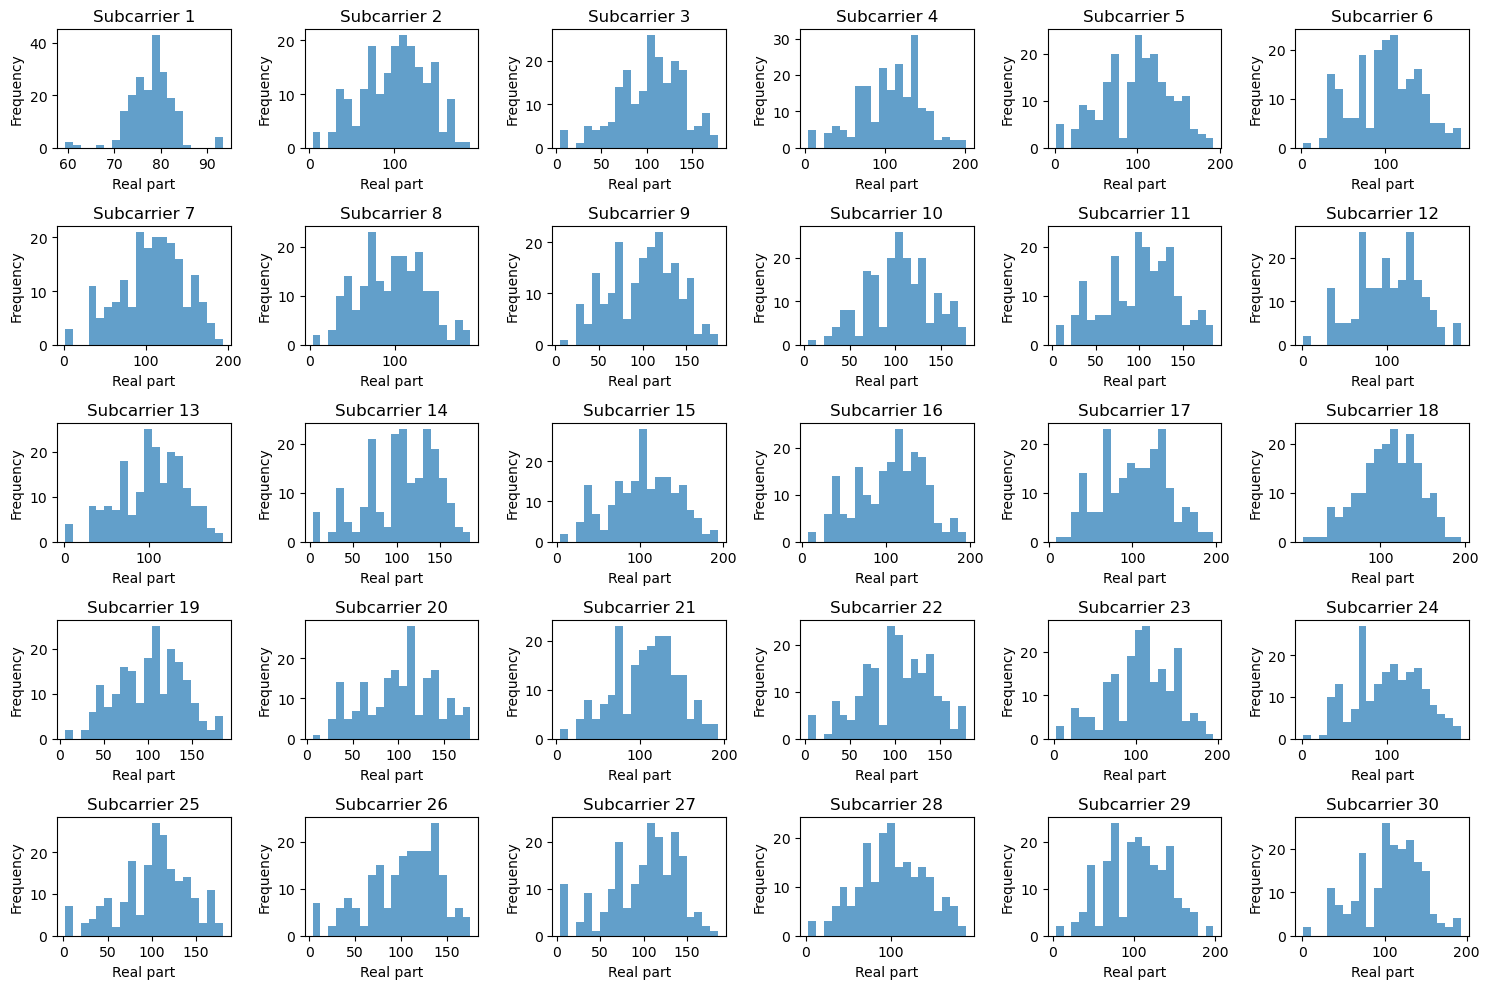

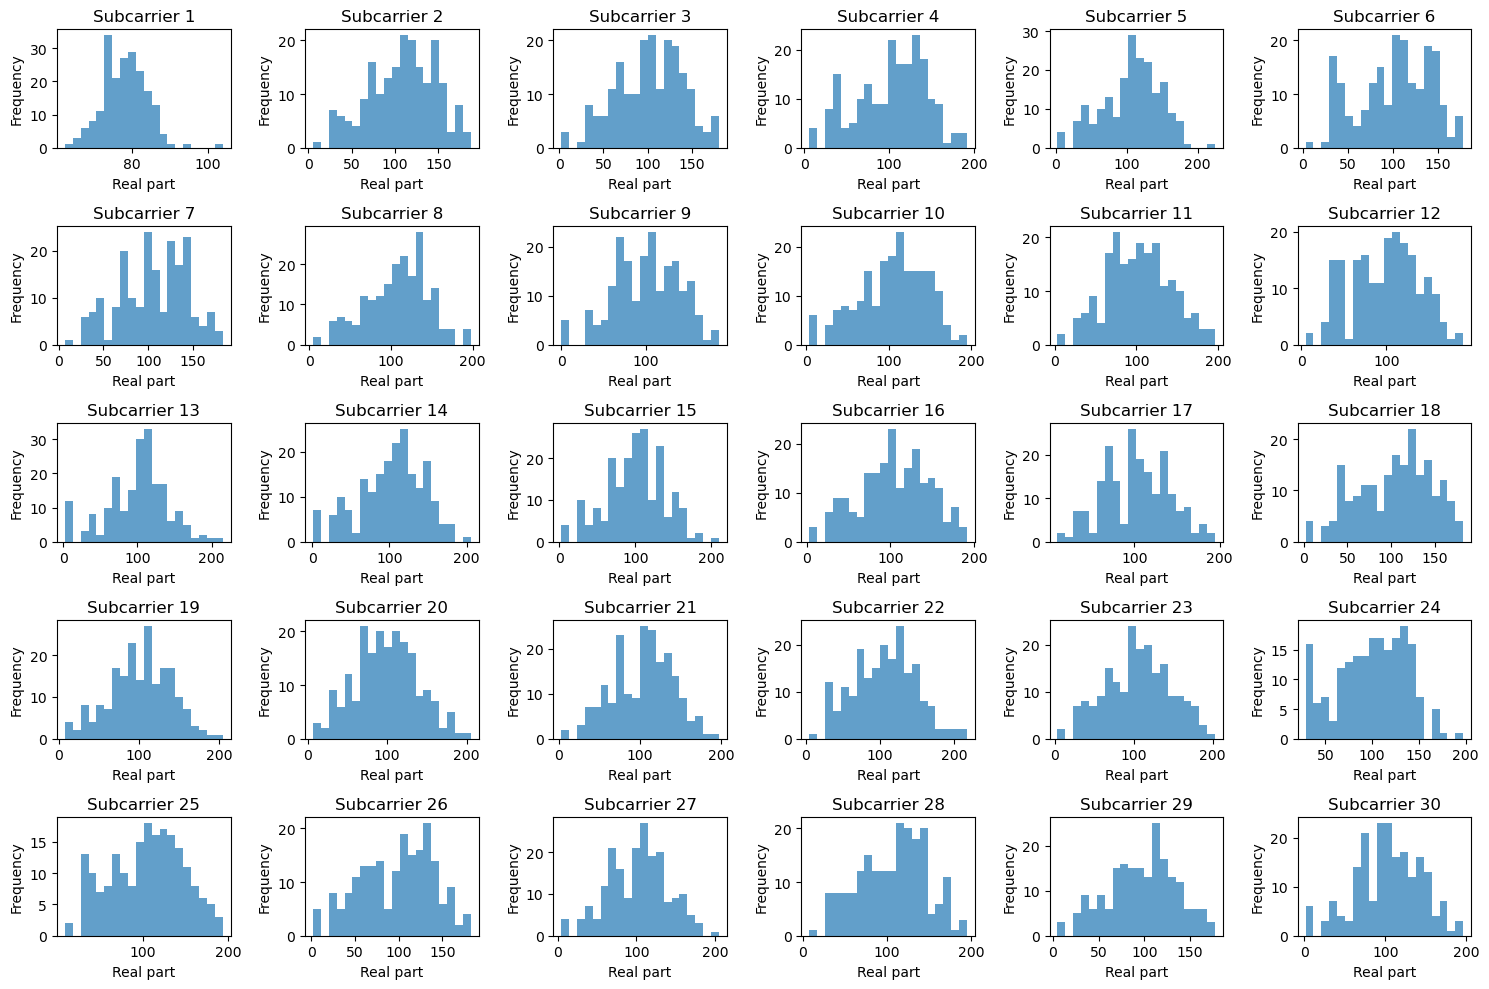

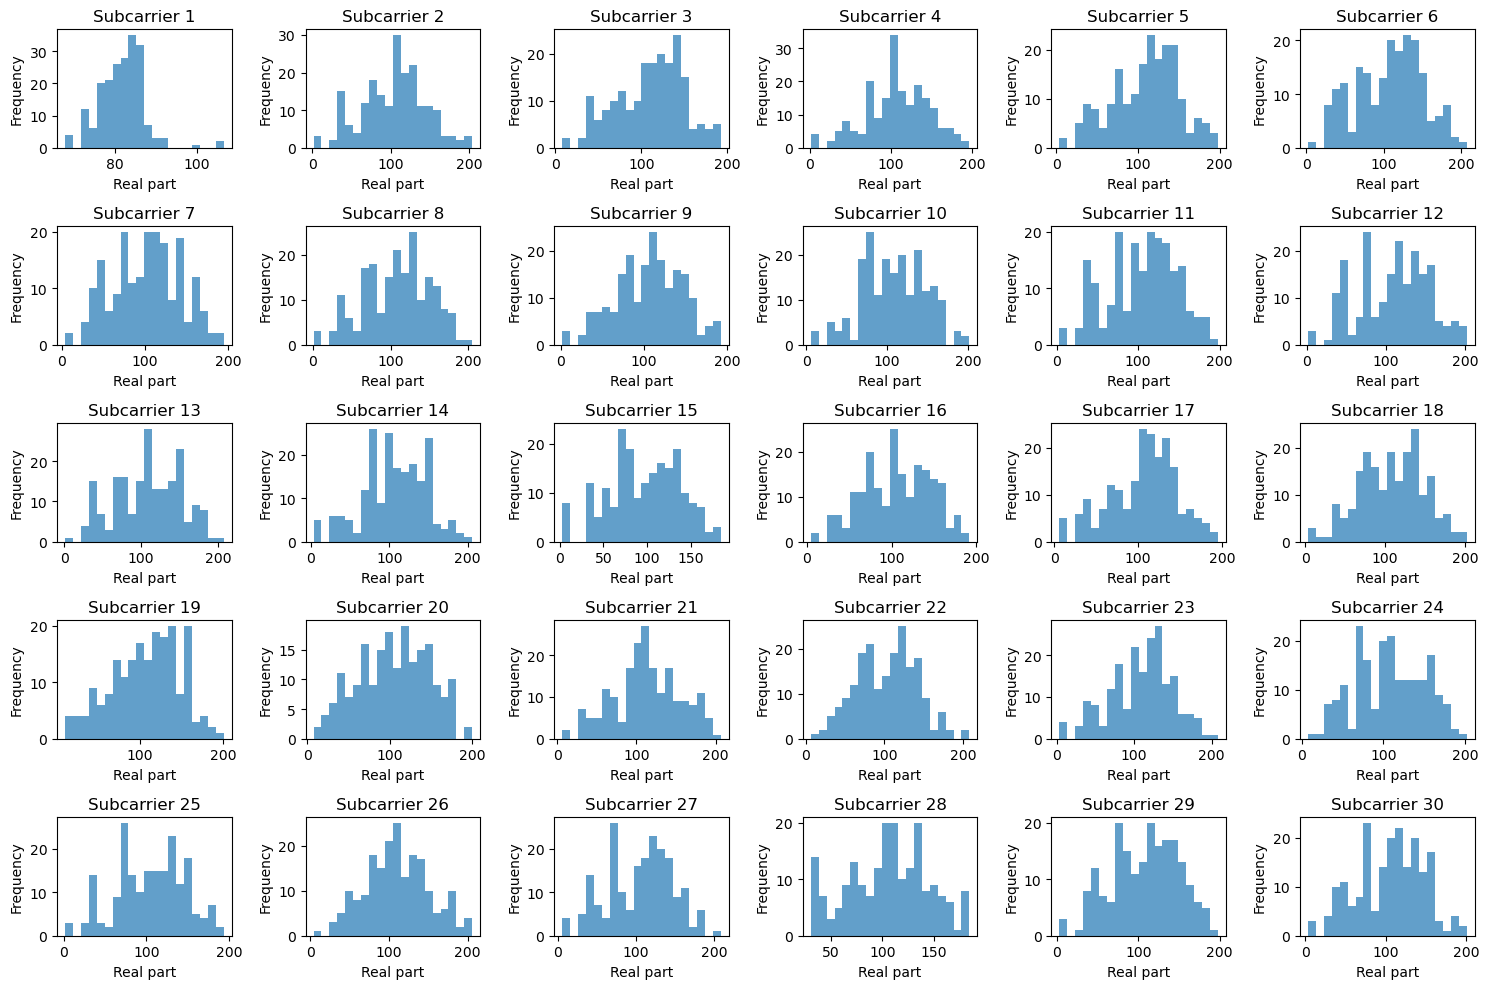

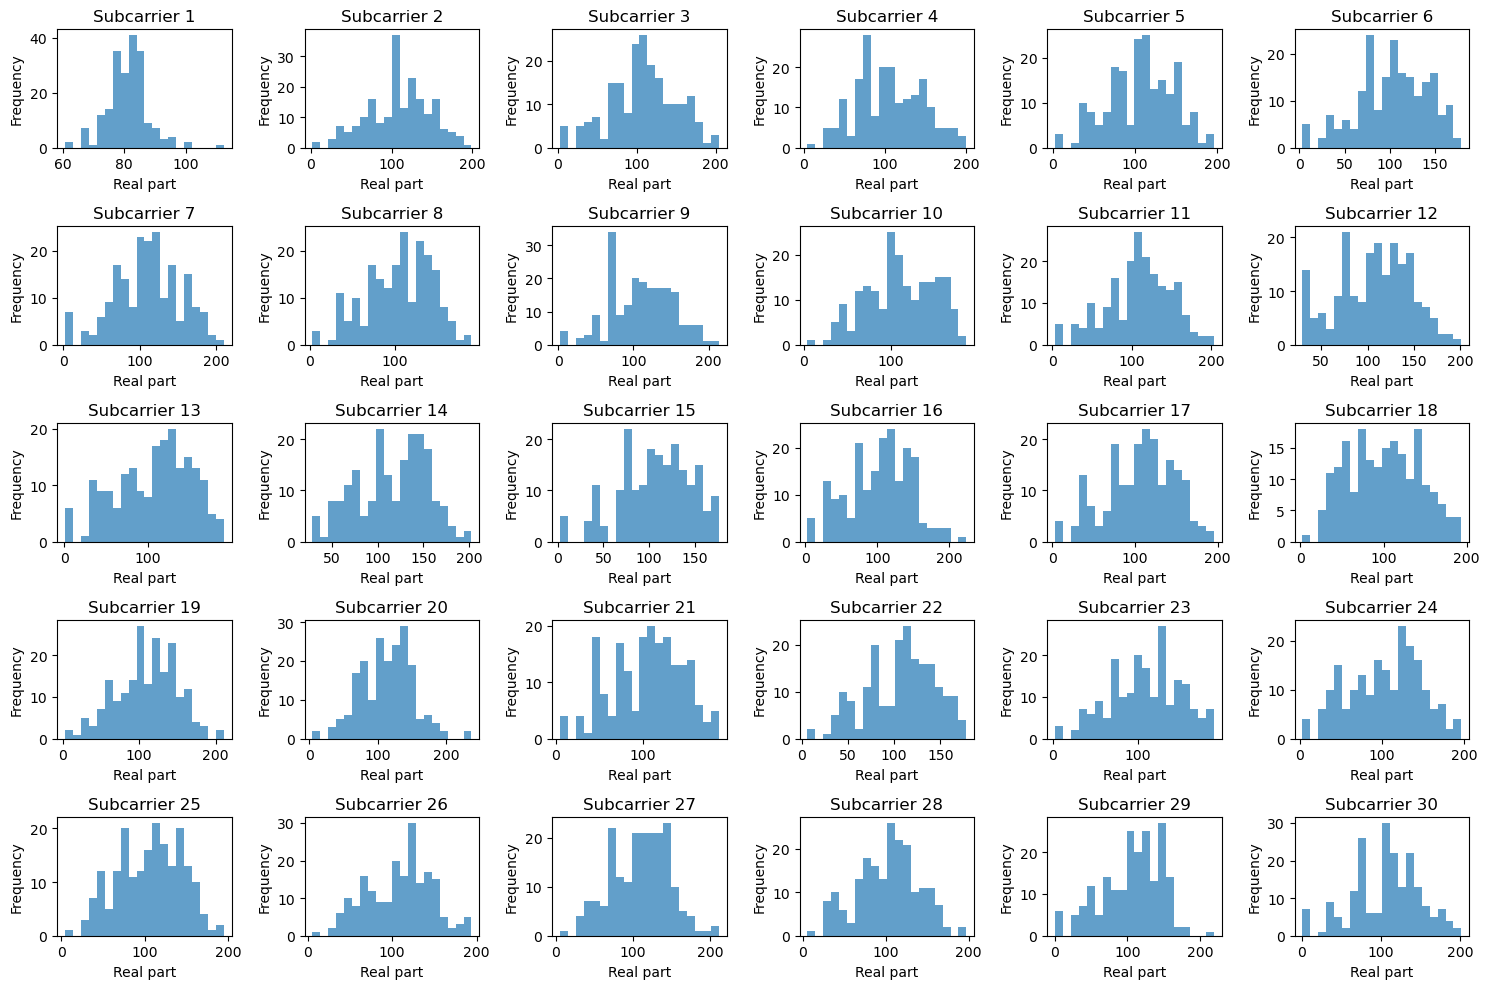

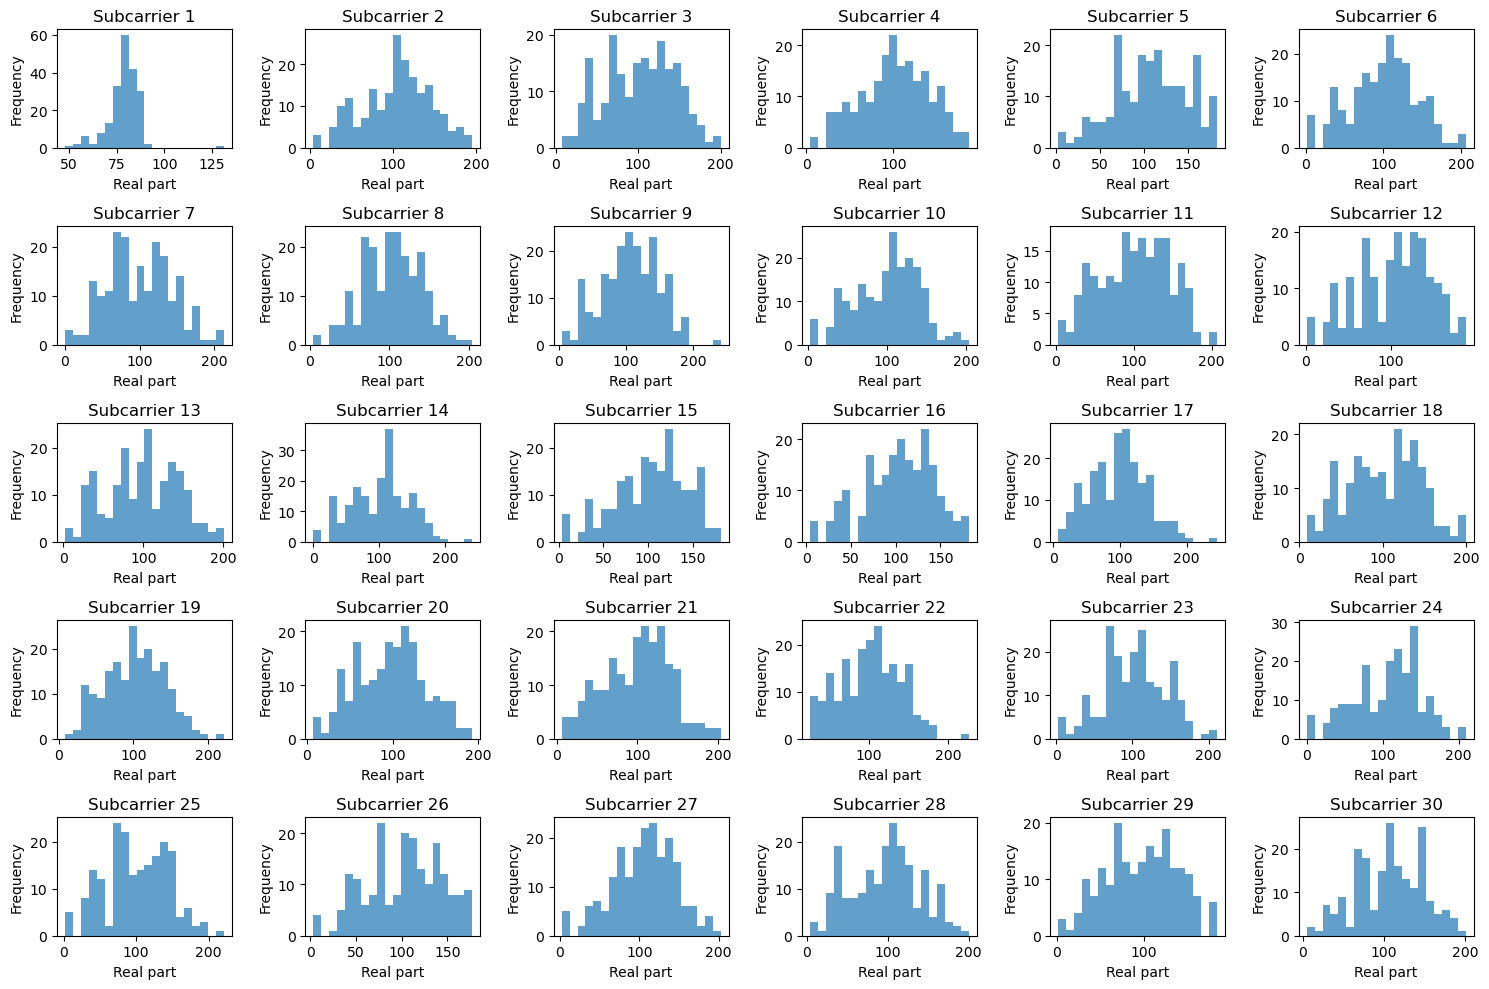

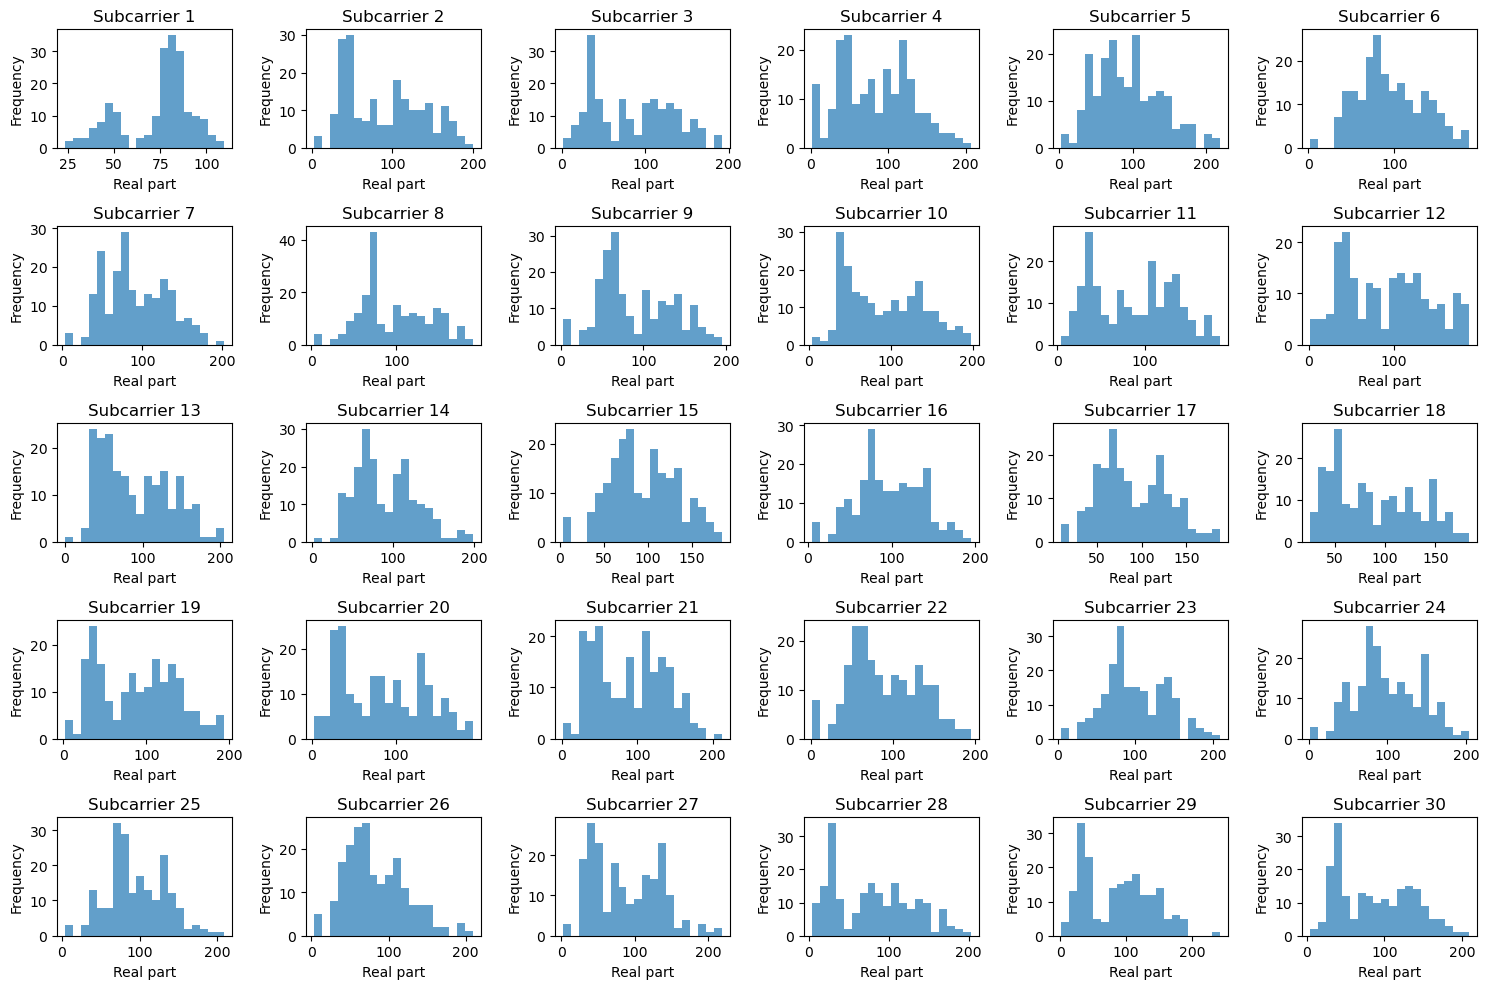

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'csi_data' is your CSI data with dimensions (200, 30, 3, 2760)
# You can load your data into 'csi_data' here

# Select the first sample and the first transmitter antenna
for i in range(0, 10):
    sample_index = i
    antenna_index = 0
    csi_sample = csi_data[:, :, antenna_index, sample_index]
    
    # Plot histograms for all 30 subcarriers
    plt.figure(figsize=(15, 10))
    for subcarrier_index in range(csi_sample.shape[1]):
        plt.subplot(5, 6, subcarrier_index + 1)
        plt.hist(np.abs(csi_sample[:, subcarrier_index]), bins=20, alpha=0.7)
        plt.title(f'Subcarrier {subcarrier_index + 1}')
        plt.xlabel('Real part')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


In [ ]:
csi_data = np.abs(csiu_home)
csi_data = np.transpose(csi_data, (3, 2, 0, 1))
csi_data.shape

80.17845957681436

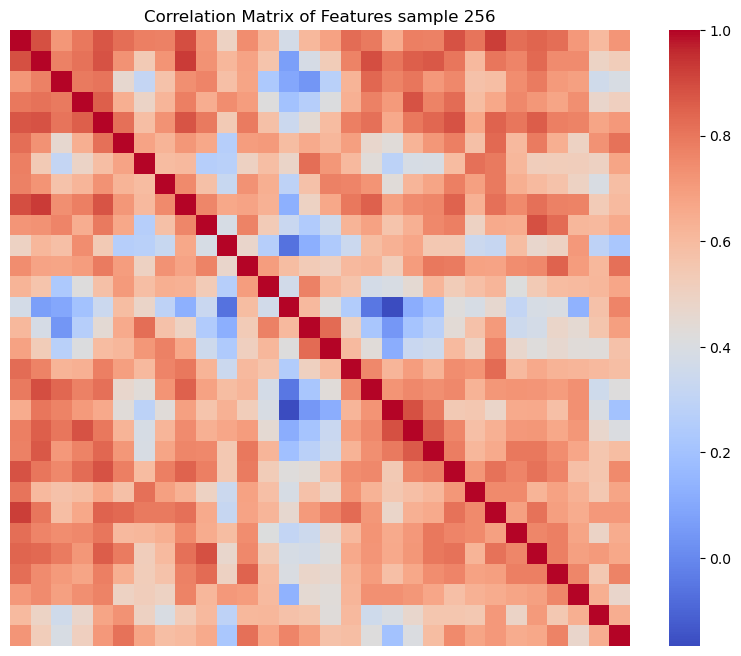

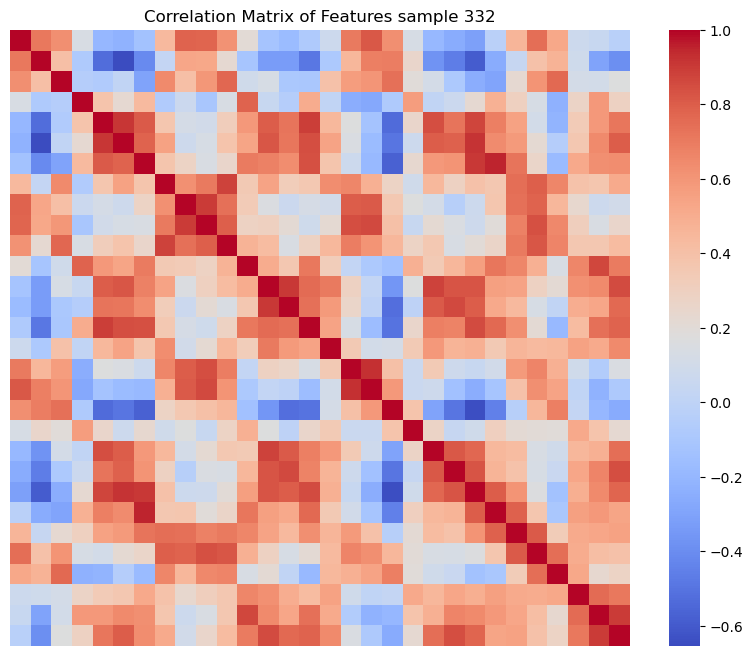

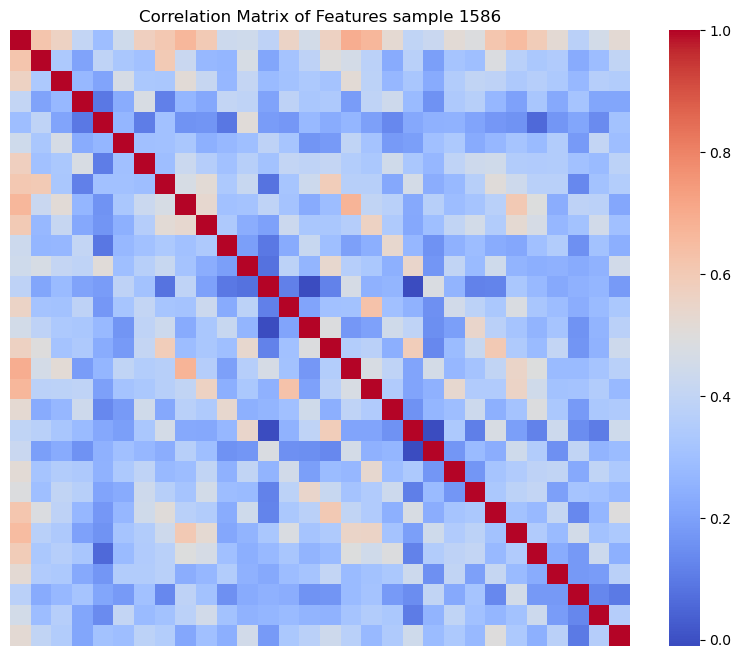

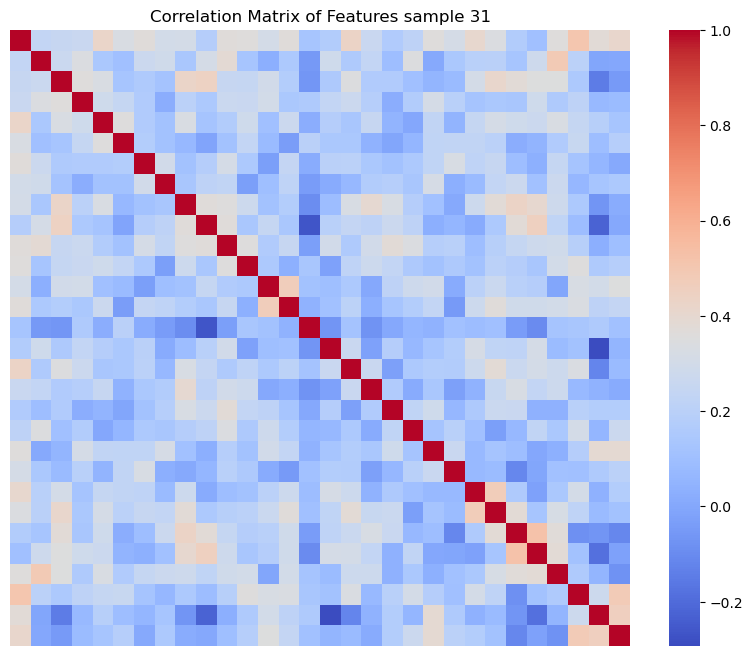

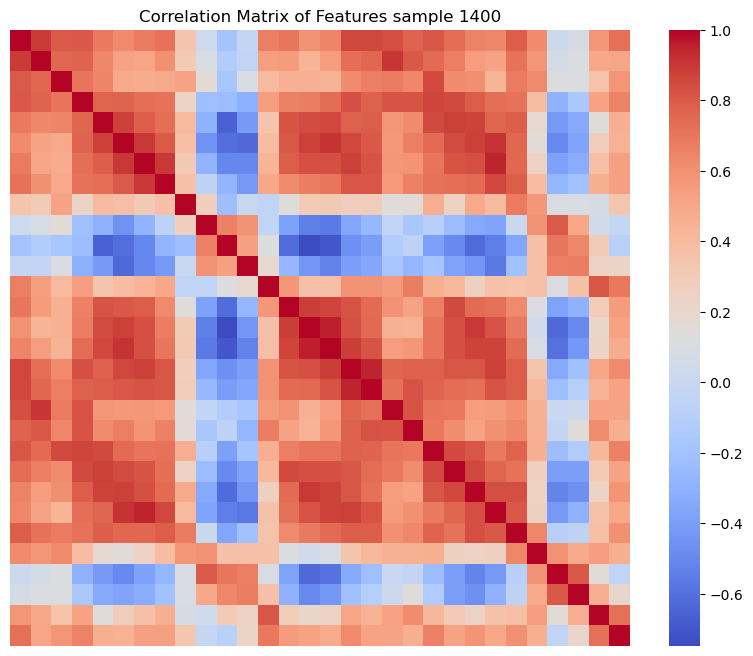

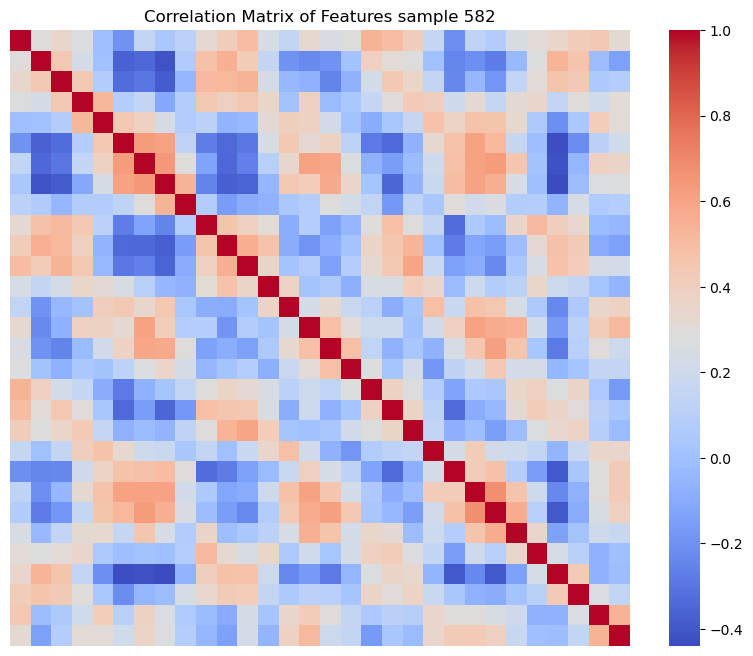

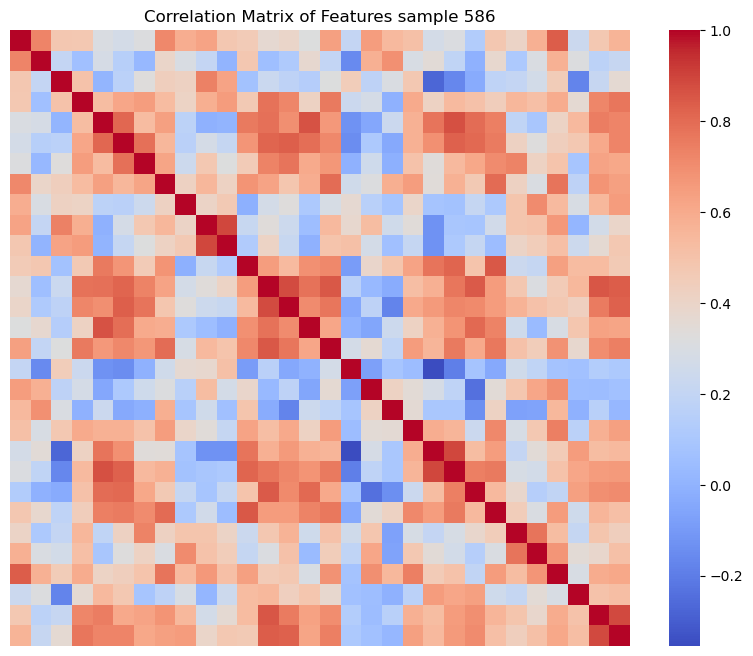

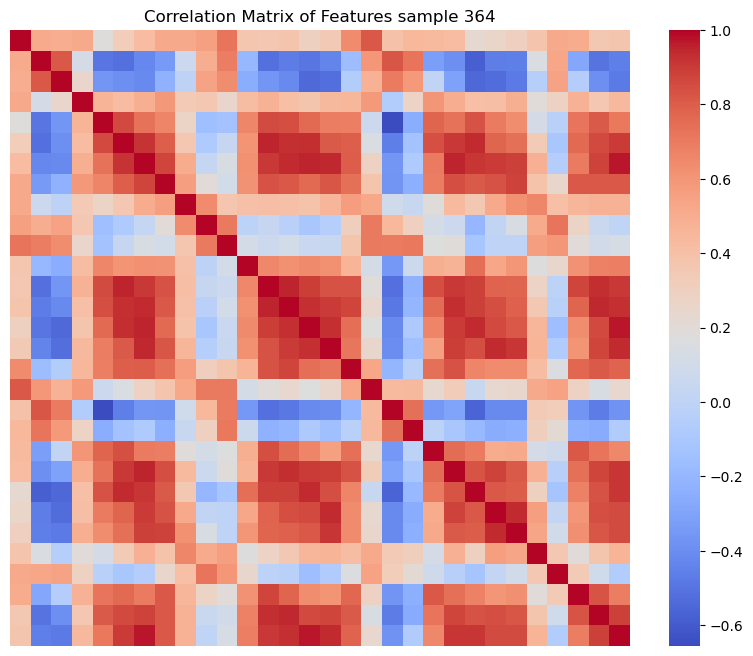

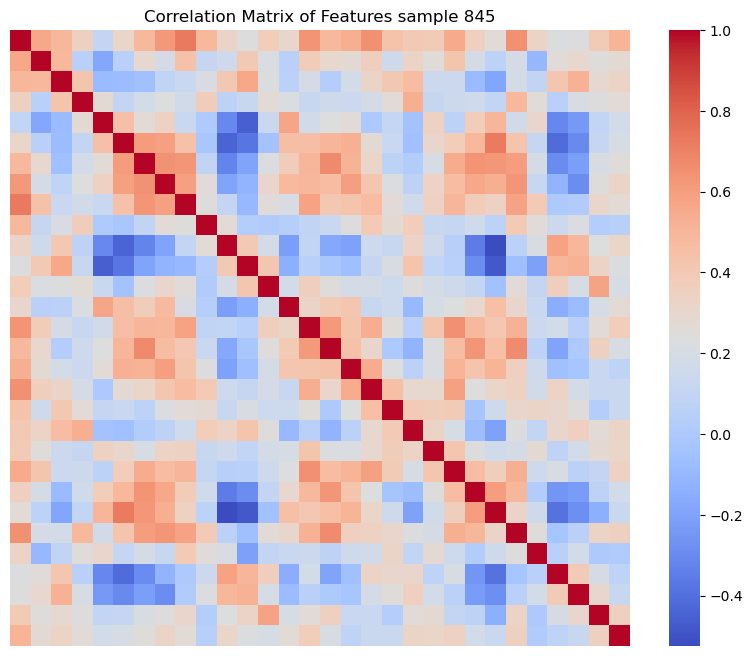

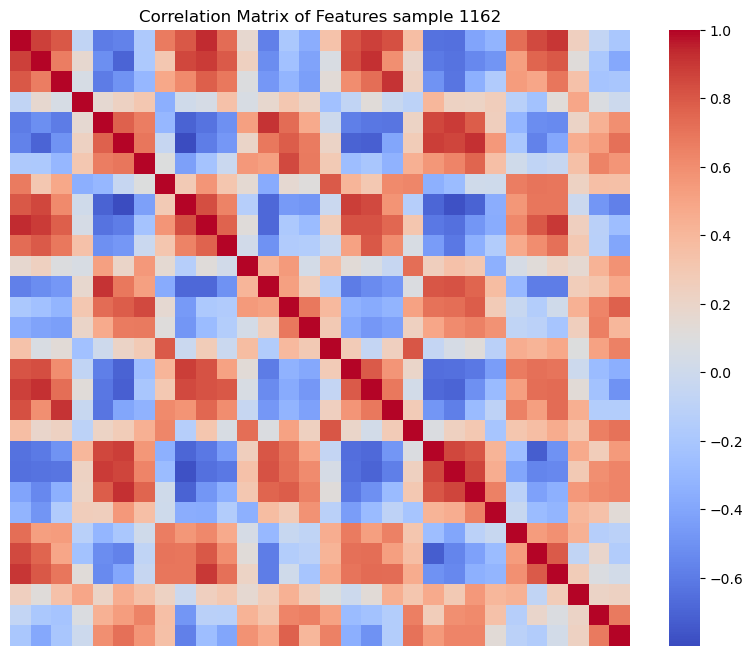

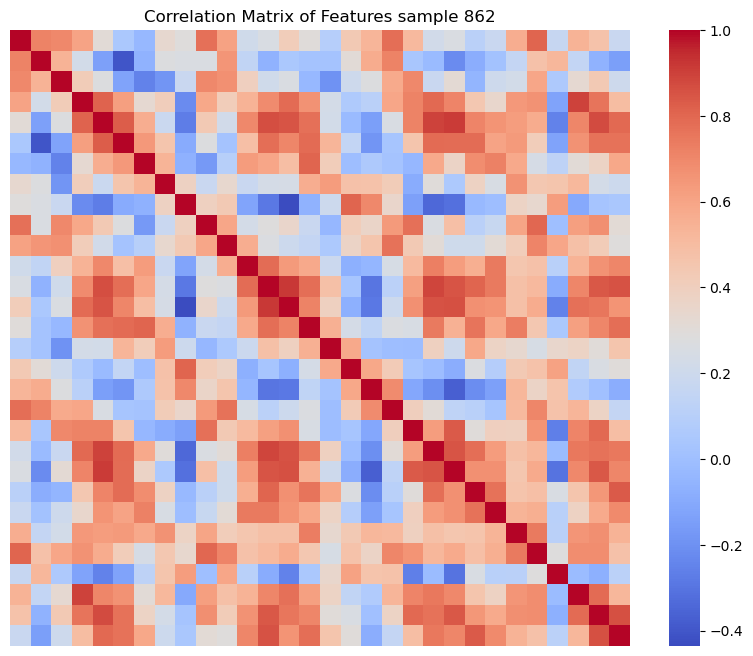

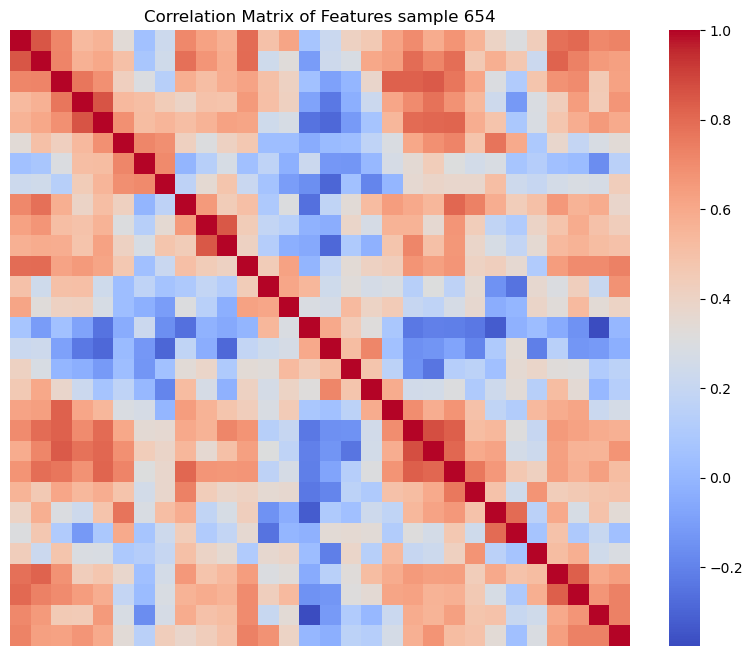

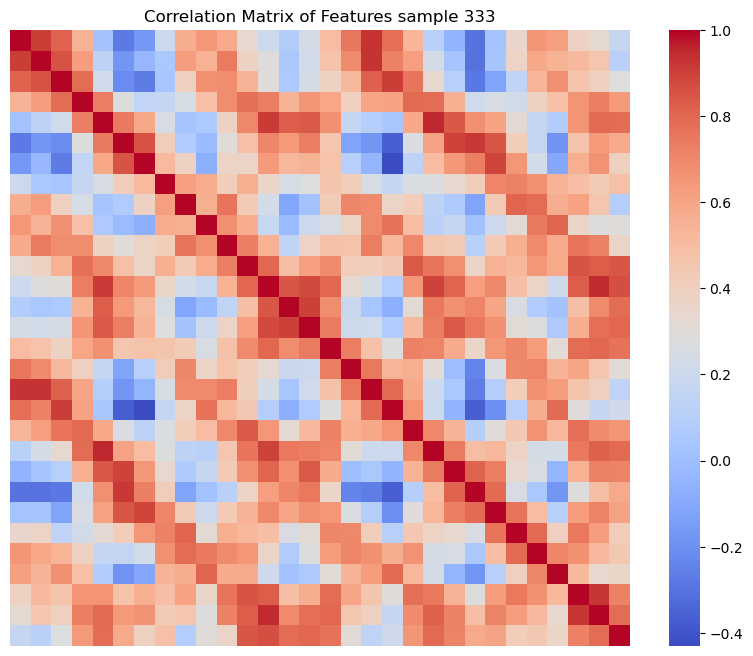

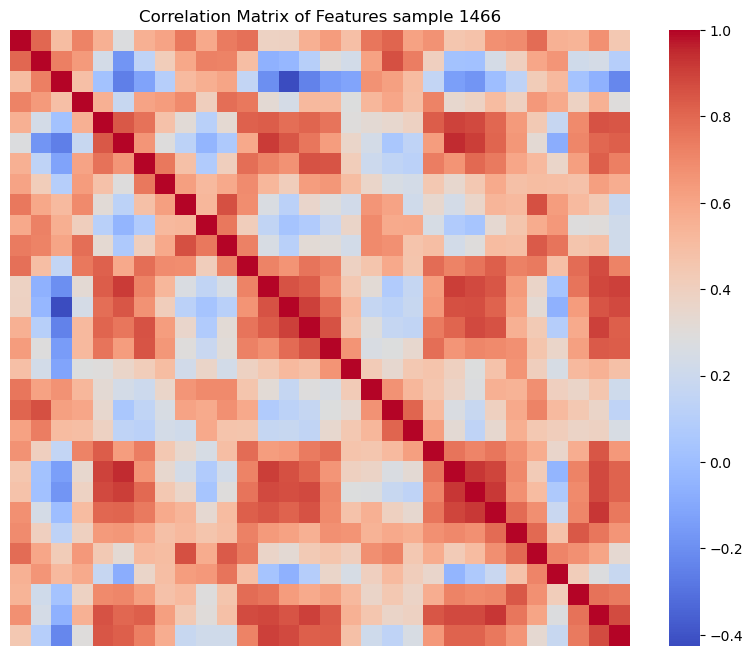

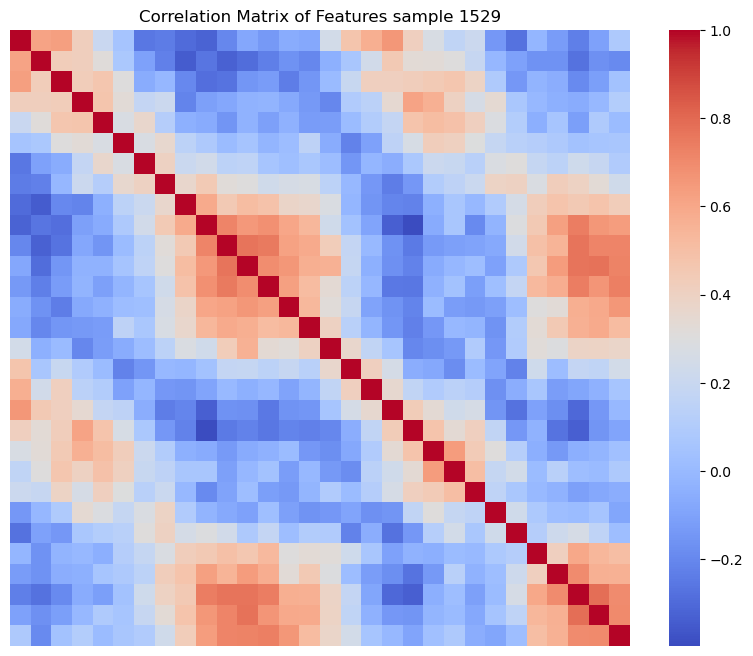

In [42]:
for j in range(0, 15):
    j = int( np.random.uniform(0, 2000))
    corr_matrix = np.corrcoef(csi_data[:, :, 2, j], rowvar=False)
    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=False, yticklabels=False)
    plt.title(f'Correlation Matrix of Features sample {j}')
    plt.show()